In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('AA.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72054 entries, 0 to 72053
Data columns (total 73 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ChkFltDate               72054 non-null  object
 1   FltName                  72054 non-null  object
 2   FltCode                  72054 non-null  int64 
 3   DateOfTravel             72054 non-null  object
 4   EqptType                 72051 non-null  object
 5   ArrLocalGateBag          72054 non-null  int64 
 6   ArrConxBag               72054 non-null  object
 7   ArrConxGateBag           72054 non-null  int64 
 8   ArrLocalPaxBrd           72054 non-null  int64 
 9   ArrLocalPaxIn6Hr         72054 non-null  int64 
 10  ArrConxPaxBrd            72054 non-null  int64 
 11  ArrConxPaxIn6Hr          72054 non-null  int64 
 12  ArrConxPaxsWithIntlLeg   72054 non-null  int64 
 13  ArrLocalPaxsWithIntlLeg  72054 non-null  int64 
 14  ArrConxSortOnePaxs       72054 non-nul

In [4]:
data['BankNumber'].value_counts()

bank-02    13496
bank-03    12023
bank-01     9406
bank-04     8864
bank-05     7237
bank-06     5374
bank-00     4656
bank-07     3645
bank-08     2673
bank-09     1925
bank-10     1138
bank-11      630
bank-12      380
bank-13      262
bank-14      178
bank-15      135
bank-16       20
bank-17       12
Name: BankNumber, dtype: int64

In [5]:
data['BankType'].value_counts()

ml    42424
rg    29630
Name: BankType, dtype: int64

Mainline Sortation One Bag count is:  122660
Regional Bank Sortation One Bag count is:  42916


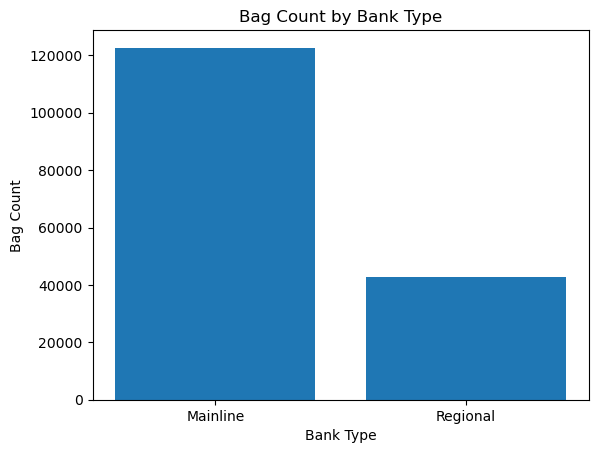

In [14]:
# Split the DataFrame into subsets based on "BankType"
mainline_df = data[data["BankType"] == "ml"]
regional_df = data[data["BankType"] == "rg"]

# Compute the sum of "ArrLocalBag" for each subset
mainline_bag_count = mainline_df["ArrConxSortOneBags"].sum()
regional_bag_count = regional_df["ArrConxSortOneBags"].sum()

# print the count
print("Mainline Sortation One Bag count is: ",mainline_bag_count)
print("Regional Bank Sortation One Bag count is: ",regional_bag_count)

# Create a bar chart showing the bag count for each bank type
bank_types = ["Mainline", "Regional"]
bag_counts = [mainline_bag_count, regional_bag_count]

plt.bar(bank_types, bag_counts)
plt.title("Bag Count by Bank Type")
plt.xlabel("Bank Type")
plt.ylabel("Bag Count")
plt.show()

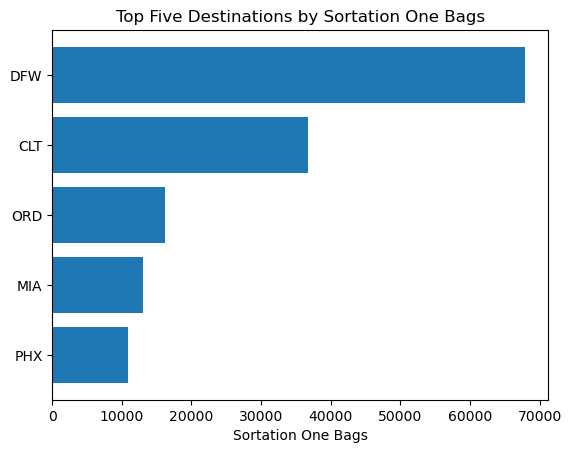

In [15]:
# Group by destination and compute sum of ArrConxSortOneBags
destinations = data.groupby("Destination")["ArrConxSortOneBags"].sum()

# Sort destinations by their corresponding bag counts in ascending order
sorted_destinations = destinations.sort_values(ascending=True)

# Plot the bar chart
plt.barh(sorted_destinations.index[-5:], sorted_destinations[-5:])
plt.xlabel("Sortation One Bags")
plt.title("Top Five Destinations by Sortation One Bags")
plt.show()


In [16]:
# Get the top five destinations by bag count
top_destinations = destinations.nlargest(5)

# Print the top five destinations with their bag count
print("Top Five Destinations by Bag Count:")
for destination, bag_count in top_destinations.items():
    print(destination, ":", bag_count)

Top Five Destinations by Bag Count:
DFW : 67851
CLT : 36748
ORD : 16151
MIA : 13104
PHX : 10874


In [17]:
data["DateOfTravel"].head(5)

0    2023-Jan-01
1    2023-Jan-01
2    2023-Jan-01
3    2023-Jan-01
4    2023-Jan-01
Name: DateOfTravel, dtype: object